# import libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Preparing and Understanding the data

In [2]:
df=pd.read_csv("vehicles.csv") 
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
df.sample(10, random_state=100)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
386556,7310167837,https://stgeorge.craigslist.org/ctd/d/salt-lak...,st george,https://stgeorge.craigslist.org,8550,2013.0,toyota,sienna,NaN,6 cylinders,...,NaN,van,silver,https://images.craigslist.org/00r0r_gjqHwSh3WB...,Engine: 6 Cylinders Transmission: Automatic Ti...,NaN,ut,40.746636,-111.939633,2021-04-20T20:28:56-0600
48650,7316539496,https://reno.craigslist.org/ctd/d/sacramento-2...,reno / tahoe,https://reno.craigslist.org,0,2015.0,ford,f-550 f550 f 550,excellent,10 cylinders,...,full-size,truck,white,https://images.craigslist.org/00909_99KdbM2Z2e...,"MONTHLY PUBLIC AUCTION SATURDAY – MAY 8th, 202...",NaN,ca,38.553900,-121.369300,2021-05-03T18:00:45-0700
373265,7304670264,https://elpaso.craigslist.org/ctd/d/el-paso-19...,el paso,https://elpaso.craigslist.org,8800,1999.0,chevrolet,corvette,NaN,NaN,...,NaN,coupe,silver,https://images.craigslist.org/00A0A_3vakBK4mjQ...,"1999 Chevrolet, Chevy Corvette Hardtop ☎ 915-2...",NaN,tx,31.810800,-106.240000,2021-04-10T09:05:37-0600
135832,7316937484,https://spokane.craigslist.org/ctd/d/coeur-ale...,spokane / coeur d'alene,https://spokane.craigslist.org,5277,2007.0,subaru,outback 2.5i limited,like new,4 cylinders,...,mid-size,wagon,custom,https://images.craigslist.org/00c0c_eiSpRTtgn0...,2007 Subaru Outback when's and drives perfect ...,NaN,id,47.681600,-116.756900,2021-05-04T13:54:05-0700
421385,7306708288,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,34590,2018.0,dodge,durango gt sport utility,good,6 cylinders,...,NaN,SUV,blue,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,wi,43.070000,-89.380000,2021-04-14T11:11:00-0500
191837,7316270083,https://worcester.craigslist.org/ctd/d/rochdal...,worcester / central MA,https://worcester.craigslist.org,7900,2006.0,toyota,rav4 limited,excellent,4 cylinders,...,mid-size,SUV,brown,https://images.craigslist.org/01010_jxcC14bmMD...,Nice 4WD Toyota RAV4 with 101k miles. It is a ...,NaN,ma,42.199700,-71.906900,2021-05-03T12:49:34-0400
126048,7304217087,https://macon.craigslist.org/ctd/d/macon-2019-...,macon / warner robins,https://macon.craigslist.org,25590,2019.0,gmc,acadia sle-1 sport utility,good,NaN,...,NaN,SUV,black,https://images.craigslist.org/00l0l_2gNZhcpqfn...,Carvana is the safer way to buy a car During t...,NaN,ga,32.809500,-83.616800,2021-04-09T12:41:18-0400
49936,7313235399,https://reno.craigslist.org/ctd/d/atlanta-2015...,reno / tahoe,https://reno.craigslist.org,17990,2015.0,volkswagen,golf tdi sel,good,NaN,...,NaN,sedan,white,https://images.craigslist.org/00000_KNY0kE0TqA...,Carvana is the safer way to buy a car During t...,NaN,ca,33.779214,-84.411811,2021-04-27T04:21:07-0700
221323,7310333889,https://semo.craigslist.org/ctd/d/park-hills-2...,southeast missouri,https://semo.craigslist.org,29977,2000.0,chevrolet,corvette,NaN,8 cylinders,...,NaN,coupe,silver,https://images.craigslist.org/00p0p_gJP2rR3R6Q...,CarSmart of FarmingtonAsk for: Call Or Text☎ (...,NaN,mo,37.820812,-90.457720,2021-04-21T10:13:18-0500
171159,7316005187,https://lexington.craigslist.org/cto/d/berea-2...,lexington,https://lexington.craigslist.org,8900,2010.0,toyota,rav4,NaN,4 cylinders,...,NaN,NaN,white,https://images.craigslist.org/00P0P_kme70OkdfY...,"2010 Toyota RAV4 limited 2.5L 4cyl auto, leath...",NaN,ky,37.601746,-84.301924,2021-05-02T20:10:24-0400


In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [6]:
df.shape

(426880, 26)

In [7]:
df.describe()


,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [8]:
df.year.unique()

array([  nan, 2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019.,
       2011., 1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003.,
       2008., 2007., 2005., 1966., 2009., 1998., 2002., 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1960., 1991., 1972., 1988., 1994.,
       1929., 1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937.,
       1985., 1957., 1953., 1942., 1963., 1977., 1993., 1903., 1990.,
       1965., 1982., 1948., 1983., 1936., 1932., 1951., 1931., 1980.,
       1967., 1971., 1947., 1981., 1926., 1962., 1975., 1964., 1934.,
       1952., 1940., 1959., 1950., 1930., 1956., 1922., 1928., 2022.,
       1901., 1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935.,
       1918., 1900., 1938., 1913., 1916., 1943., 1925., 1921., 1915.,
       1945., 1902., 1905., 1920., 1944., 1910., 1909.])

In [9]:
df.manufacturer.unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [10]:
df.cylinders.unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [11]:
df.paint_color.unique()

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [12]:
df.corr()

,id,price,year,odometer,county,lat,long
id,1.000000,-0.002779,-0.059040,0.010721,NaN,-0.069388,-0.121864
price,-0.002779,1.000000,-0.004925,0.010032,NaN,0.000357,-0.000408
year,-0.059040,-0.004925,1.000000,-0.157215,NaN,-0.014677,-0.001410
odometer,0.010721,0.010032,-0.157215,1.000000,NaN,-0.001459,0.009807
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,-0.069388,0.000357,-0.014677,-0.001459,NaN,1.000000,-0.128088
long,-0.121864,-0.000408,-0.001410,0.009807,NaN,-0.128088,1.000000


# Split data 

In [13]:
df_train,df_test=train_test_split(df,test_size=0.2 , random_state=0)

In [14]:
df_train,df_val=train_test_split(df_train,test_size=0.25, random_state=100)

drop unuseful colums 


In [15]:
df_train.drop(columns=['url','region_url', 'VIN','image_url','description','county'],inplace=True)

In [16]:
df_train.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

# Cleaning data 

Handling null values 

In [17]:
df_train.isna().sum()

id                   0
region               0
price                0
year               725
manufacturer     10620
model             3089
condition       104374
cylinders       106654
fuel              1759
odometer          2655
title_status      4917
transmission      1505
drive            78278
size            183899
type             55689
paint_color      78207
state                0
lat               3972
long              3972
posting_date        47
dtype: int64

In [18]:
df_train.shape  

(256128, 20)

In [19]:
size1=df_train['size']
size1.value_counts()

full-size      38080
mid-size       20680
compact        11561
sub-compact     1908
Name: size, dtype: int64

In [20]:
df_train['size'].fillna('full-size', inplace=True)

In [21]:
cylinders1=df_train['cylinders']
cylinders1.value_counts()

6 cylinders     56459
4 cylinders     46614
8 cylinders     43194
5 cylinders      1047
10 cylinders      854
other             757
3 cylinders       416
12 cylinders      133
Name: cylinders, dtype: int64

In [22]:
df_train['cylinders'].fillna('6 cylinders', inplace=True)

In [23]:
paint_color1=df_train['paint_color']
paint_color1.value_counts()

white     47562
black     37646
silver    25726
blue      18646
red       18362
grey      14657
green      4384
custom     4027
brown      3987
yellow     1314
orange     1209
purple      401
Name: paint_color, dtype: int64

In [24]:
df_train['paint_color'].fillna('white', inplace=True)

In [25]:
manufacturer1=df_train['manufacturer']
manufacturer1.value_counts()

ford               42563
chevrolet          32830
toyota             20490
honda              12798
nissan             11532
jeep               11337
ram                11079
gmc                10044
bmw                 8840
dodge               8093
mercedes-benz       7137
hyundai             6207
subaru              5701
volkswagen          5608
kia                 5042
lexus               4920
audi                4520
cadillac            4167
chrysler            3636
acura               3609
buick               3327
mazda               3256
infiniti            2918
lincoln             2595
volvo               2030
mitsubishi          1977
mini                1441
pontiac             1379
rover               1291
jaguar              1175
porsche              840
mercury              685
saturn               667
alfa-romeo           557
tesla                525
fiat                 463
harley-davidson       95
ferrari               63
datsun                41
aston-martin          14


In [26]:
df_train['manufacturer'].fillna('ford', inplace=True)

In [27]:
condition1=df_train['condition']
condition1.value_counts()

good         73070
excellent    60698
like new     12727
fair          4109
new            791
salvage        359
Name: condition, dtype: int64

In [28]:
df_train['condition'].fillna('good', inplace=True)

In [29]:
drive1=df_train['drive']
drive1.value_counts()

4wd    78914
fwd    63393
rwd    35543
Name: drive, dtype: int64

In [30]:
df_train['drive'].fillna('fwd', inplace=True)

In [31]:
type1=df_train['type']
type1.value_counts()

sedan          52435
SUV            46166
pickup         25989
truck          21170
other          13227
coupe          11573
hatchback      10078
wagon           6484
van             5167
convertible     4679
mini-van        2830
offroad          344
bus              297
Name: type, dtype: int64

In [32]:
df_train['type'].fillna('hatchback', inplace=True)


In [33]:
df_train.isna().sum()

id                 0
region             0
price              0
year             725
manufacturer       0
model           3089
condition          0
cylinders          0
fuel            1759
odometer        2655
title_status    4917
transmission    1505
drive              0
size               0
type               0
paint_color        0
state              0
lat             3972
long            3972
posting_date      47
dtype: int64

In [34]:
df_train=df_train.dropna()

In [35]:
df_train.isna().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [36]:
df_train.shape

(239733, 20)

<AxesSubplot:xlabel='condition', ylabel='price'>

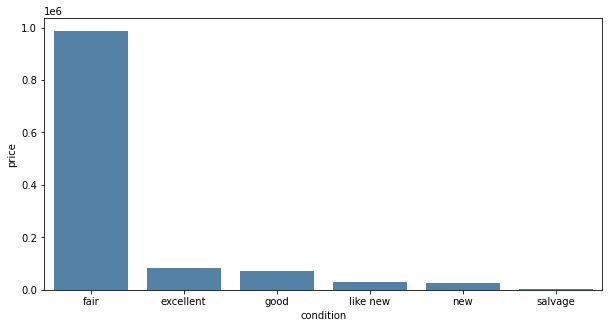

In [37]:
plt.figure(figsize = (10,5))
condition_price = pd.pivot_table(data=df_train,values='price',index='condition',aggfunc='mean').sort_values('price',ascending=False).reset_index()
sns.barplot(y='price' , x='condition',data=condition_price,color=('SteelBlue'))

<AxesSubplot:xlabel='drive', ylabel='price'>

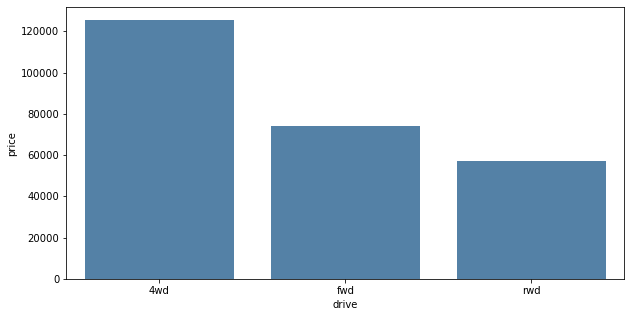

In [38]:
plt.figure(figsize = (10,5))
drive_price = pd.pivot_table(data=df_train,values='price',index='drive',aggfunc='mean').sort_values('price',ascending=False).reset_index()
sns.barplot(y='price' , x='drive',data=drive_price,color=('SteelBlue'))

<AxesSubplot:xlabel='manufacturer', ylabel='price'>

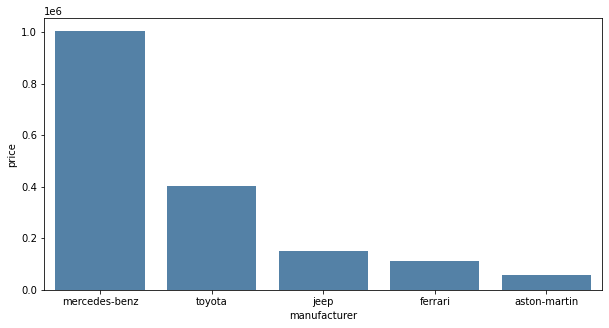

In [39]:
plt.figure(figsize = (10,5))
manufacturer_price = pd.pivot_table(data=df_train,values='price',index='manufacturer',aggfunc='mean').sort_values('price',ascending=False).reset_index().head(5)
sns.barplot(y='price' , x='manufacturer',data=manufacturer_price,color=('SteelBlue'))

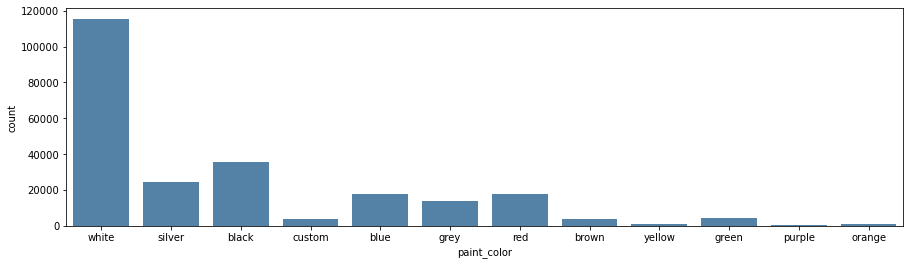

In [40]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_train,x="paint_color",color=('SteelBlue'))
plt.show()

<AxesSubplot:xlabel='year', ylabel='Density'>

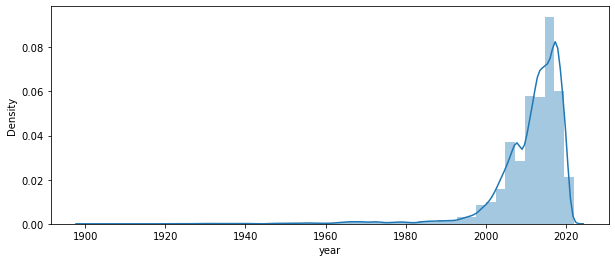

In [41]:
plt.figure(figsize=(10,4))
sns.distplot(df_train['year'])

In [42]:
#plt.figure(figsize = (10,5))
#model_price = pd.pivot_table(data=df_train,values='price',index='model',aggfunc='mean').sort_values('price',ascending=False).reset_index()
#sns.barplot(y='price' , x='model',data=model_price,color=('SteelBlue'))

<AxesSubplot:xlabel='fuel', ylabel='price'>

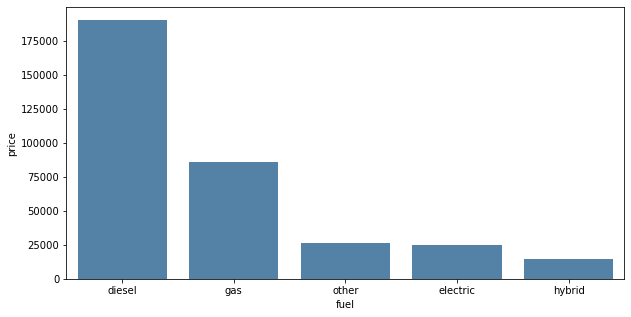

In [43]:
plt.figure(figsize = (10,5))
fuel_price = pd.pivot_table(data=df_train,values='price',index='fuel',aggfunc='mean').sort_values('price',ascending=False).reset_index()
sns.barplot(y='price' , x='fuel',data=fuel_price,color=('SteelBlue'))

<AxesSubplot:xlabel='size', ylabel='price'>

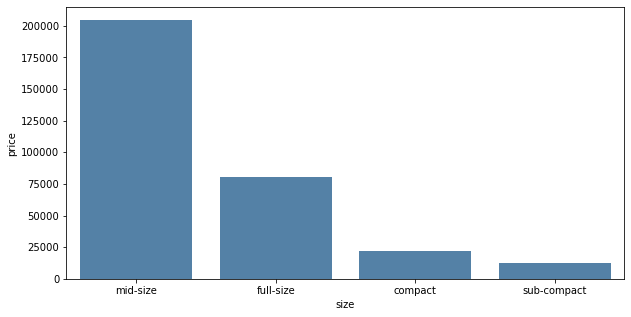

In [44]:
plt.figure(figsize = (10,5))
size_price = pd.pivot_table(data=df_train,values='price',index='size',aggfunc='mean').sort_values('price',ascending=False).reset_index()
sns.barplot(y='price' , x='size',data=size_price,color=('SteelBlue'))

In [45]:
#plt.figure(figsize = (10,5))
#paint_color_price = pd.pivot_table(data=df_train,values='price',index='paint_color').sort_values('price',ascending=False).reset_index()
#sns.barplot(y='price' , x='paint_color',data=paint_color_price,color=('SteelBlue'))

<AxesSubplot:xlabel='type', ylabel='price'>

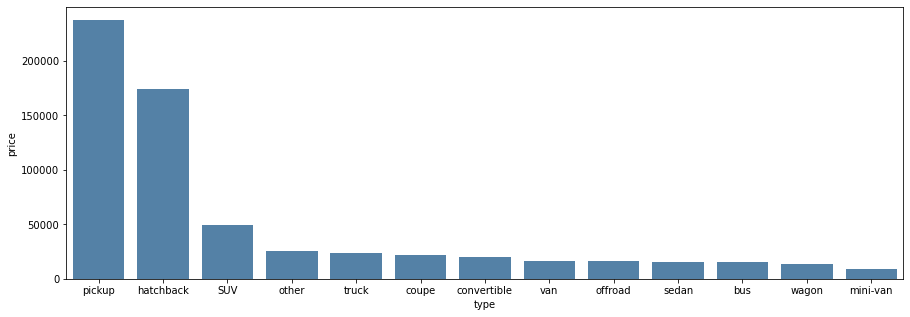

In [46]:
plt.figure(figsize = (15,5))
type_price = pd.pivot_table(data=df_train,values='price',index='type',aggfunc='mean').sort_values('price',ascending=False).reset_index()
sns.barplot(y='price' , x='type',data=type_price,color=('SteelBlue'))

<AxesSubplot:xlabel='price,odometer'>

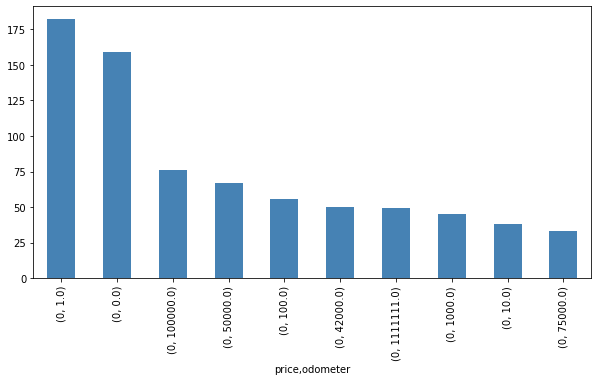

In [47]:
plt.figure(figsize = (10,5))
df_train.groupby('price')['odometer'].value_counts().head(10).plot(kind='bar',color=('SteelBlue'))

In [48]:
df_train["odometer"].sort_values()


148898           0.0
72850            0.0
158486           0.0
299600           0.0
134738           0.0
             ...    
108797    10000000.0
106542    10000000.0
105059    10000000.0
110623    10000000.0
172766    10000000.0
Name: odometer, Length: 239733, dtype: float64

In [49]:
df_train.odometer.astype(int)

224952    235801
424366    118565
302479    131201
145176    146000
75935     153700
           ...  
291377     98000
287338    100000
93746      96500
389237    150000
236773     50000
Name: odometer, Length: 239733, dtype: int64

In [50]:
#df_train = df_train[~(df_train.odometer > 500000)]
#df_train.shape

<AxesSubplot:xlabel='odometer', ylabel='Density'>

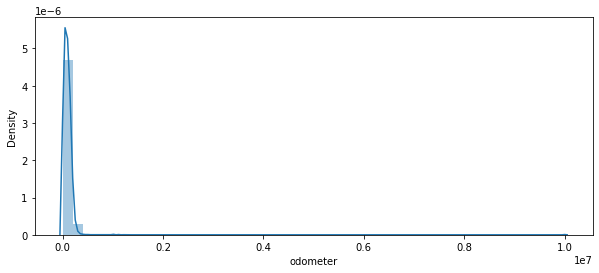

In [51]:
plt.figure(figsize=(10,4))
sns.distplot(df_train['odometer'])

In [52]:
#plt.figure(figsize = (15,5))
#type_price = pd.pivot_table(data=df_train,values='price',index='type',aggfunc='mean').sort_values('price',ascending=False).reset_index()
#sns.barplot(y='price' , x='type',data=type_price,color=('SteelBlue'))

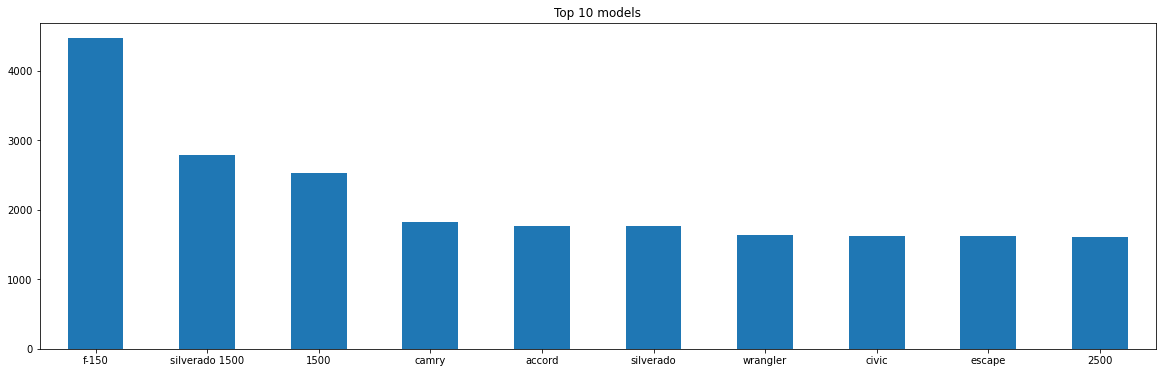

In [53]:
df_train['model'].value_counts().head(10).plot.bar(figsize=(20,6),rot=0, title="Top 10 models")
plt.show()

            odometer
count  192375.000000
mean    86353.828372
std     53325.688407
min       101.000000
25%     38600.000000
50%     84552.000000
75%    128364.000000
max    200000.000000


Skewness for odometer: 0.21




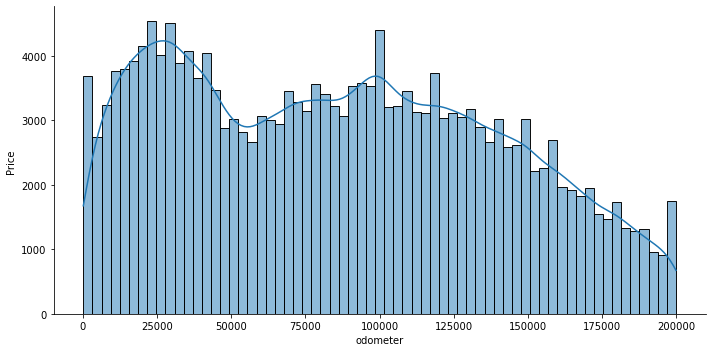

In [54]:
vehicles_prc = df_train[(df_train.price >=2000) & (df_train.price <=50000)]




vehicles_odo = vehicles_prc[(vehicles_prc.odometer >100) & (vehicles_prc.odometer <=200000)]

print(pd.DataFrame(vehicles_odo.odometer).describe())

print(f"\n\nSkewness for odometer: {round(vehicles_odo['odometer'].skew(),2)}\n\n")
sns.displot(data=vehicles_odo, x="odometer", aspect=2, height=5, kde=True)
plt.ylabel("Price ", fontsize=10);



Based on the figure above the higher odometer of cars the lower price 

# Encoding Categorical Data

In [55]:
 df_train.select_dtypes(exclude=['object']).copy()


,id,price,year,odometer,lat,long
224952,7304034786,0,2013.0,235801.0,45.793500,-108.481000
424366,7309927411,4990,2010.0,118565.0,42.987906,-88.241072
302479,7306603775,3000,2016.0,131201.0,41.641800,-83.471400
145176,7306261337,12500,2006.0,146000.0,42.255400,-89.076800
75935,7316551205,3350,2001.0,153700.0,39.910800,-105.010900
...,...,...,...,...,...,...
291377,7307694516,5995,2006.0,98000.0,39.191772,-84.252357
287338,7310261914,250,2011.0,100000.0,40.812000,-81.424100
93746,7306340896,7500,2003.0,96500.0,24.724323,-81.023782
389237,7301593436,8995,2013.0,150000.0,42.595900,-72.226700


In [56]:
df_train.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [57]:
df_train=pd.get_dummies(df_train, columns=["manufacturer"])

In [58]:
#df_train=pd.get_dummies(df_train, columns=["model"])

In [59]:
df_train=pd.get_dummies(df_train, columns=["condition"])

In [60]:
df_train=pd.get_dummies(df_train, columns=["cylinders"])

In [61]:
df_train=pd.get_dummies(df_train, columns=["fuel"])

In [62]:
df_train=pd.get_dummies(df_train, columns=["title_status"])

In [63]:
df_train=pd.get_dummies(df_train, columns=["transmission"])

In [64]:
df_train=pd.get_dummies(df_train, columns=["drive"])

In [65]:
df_train=pd.get_dummies(df_train, columns=["type"])

In [66]:
df_train=pd.get_dummies(df_train, columns=["paint_color"])

In [67]:
df_train=pd.get_dummies(df_train, columns=["size"])

In [68]:
df_train.head()

,id,region,price,year,model,odometer,state,lat,long,posting_date,...,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,size_compact,size_full-size,size_mid-size,size_sub-compact
224952,7304034786,billings,0,2013.0,f-150,235801.0,mt,45.793500,-108.481000,2021-04-09T00:01:40-0600,...,0,0,0,0,1,0,0,1,0,0
424366,7309927411,milwaukee,4990,2010.0,cobalt,118565.0,wi,42.987906,-88.241072,2021-04-20T13:05:03-0500,...,0,0,0,1,0,0,0,1,0,0
302479,7306603775,toledo,3000,2016.0,grand caravan passenger,131201.0,oh,41.641800,-83.471400,2021-04-14T09:03:47-0400,...,0,0,0,0,0,0,0,1,0,0
145176,7306261337,rockford,12500,2006.0,trailblazer ss,146000.0,il,42.255400,-89.076800,2021-04-13T12:56:16-0500,...,0,0,0,1,0,0,0,1,0,0
75935,7316551205,denver,3350,2001.0,avalon,153700.0,co,39.910800,-105.010900,2021-05-03T19:34:48-0600,...,0,0,0,0,0,0,0,1,0,0


In [69]:
df_train.drop(columns=['id','region', 'state','lat','long',"posting_date","model"],inplace=True)

In [141]:
df_train_sample=df_train.sample(500)

In [142]:
X_train, y_train = df_train_sample.drop('price',axis=1), df_train_sample['price']

In [143]:
lm = LinearRegression()


In [144]:
lm.fit(X_train, y_train)

LinearRegression()

In [145]:
lm.score(X_train, y_train)

0.5027386319837742